In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.cm as cm

In [3]:
# Read the three CSV files
df_ayush = pd.read_csv('./data/MergerdAyush_Colleges_in_India_01-04-2021_0.csv')
df_ayush.head()

,State or Union Territory,Type of System,No. of Colleges - Govt,Admission Capacity - Govt,Permitted Seats - Govt,No. of Colleges - Non-Govt,Admission Capacity - Non-Govt,Permitted Seats - Non-Govt
0,Andhra Pradesh,Ayurveda,1,100,100,2,176,118
1,Assam,Ayurveda,1,93,93,0,0,0
2,Bihar,Ayurveda,2,211,211,6,280,153
3,Chhattisgarh,Ayurveda,2,216,216,4,280,250
4,Delhi,Ayurveda,3,359,359,0,0,0


In [11]:
no_of_colleges = df_ayush[['State or Union Territory', 'Type of System','No. of Colleges - Govt', 'No. of Colleges - Non-Govt']]

In [4]:
ayush_categories = np.unique(df_ayush['Type of System'])
ayush_categories

array(['Ayurveda', 'Homoeopathy', 'Naturopathy', 'Siddha', 'Unani'],
      dtype=object)

In [13]:
grouped = no_of_colleges.groupby('State or Union Territory')
grouped

In [26]:
grouping_without_ayush = grouped.sum()
grouping_without_ayush = grouping_without_ayush.rename(columns={
    'No. of Colleges - Govt' : 'Govt',
    'No. of Colleges - Non-Govt' : 'Non-Govt'
})

# Govt vs Non-Govt for Each State

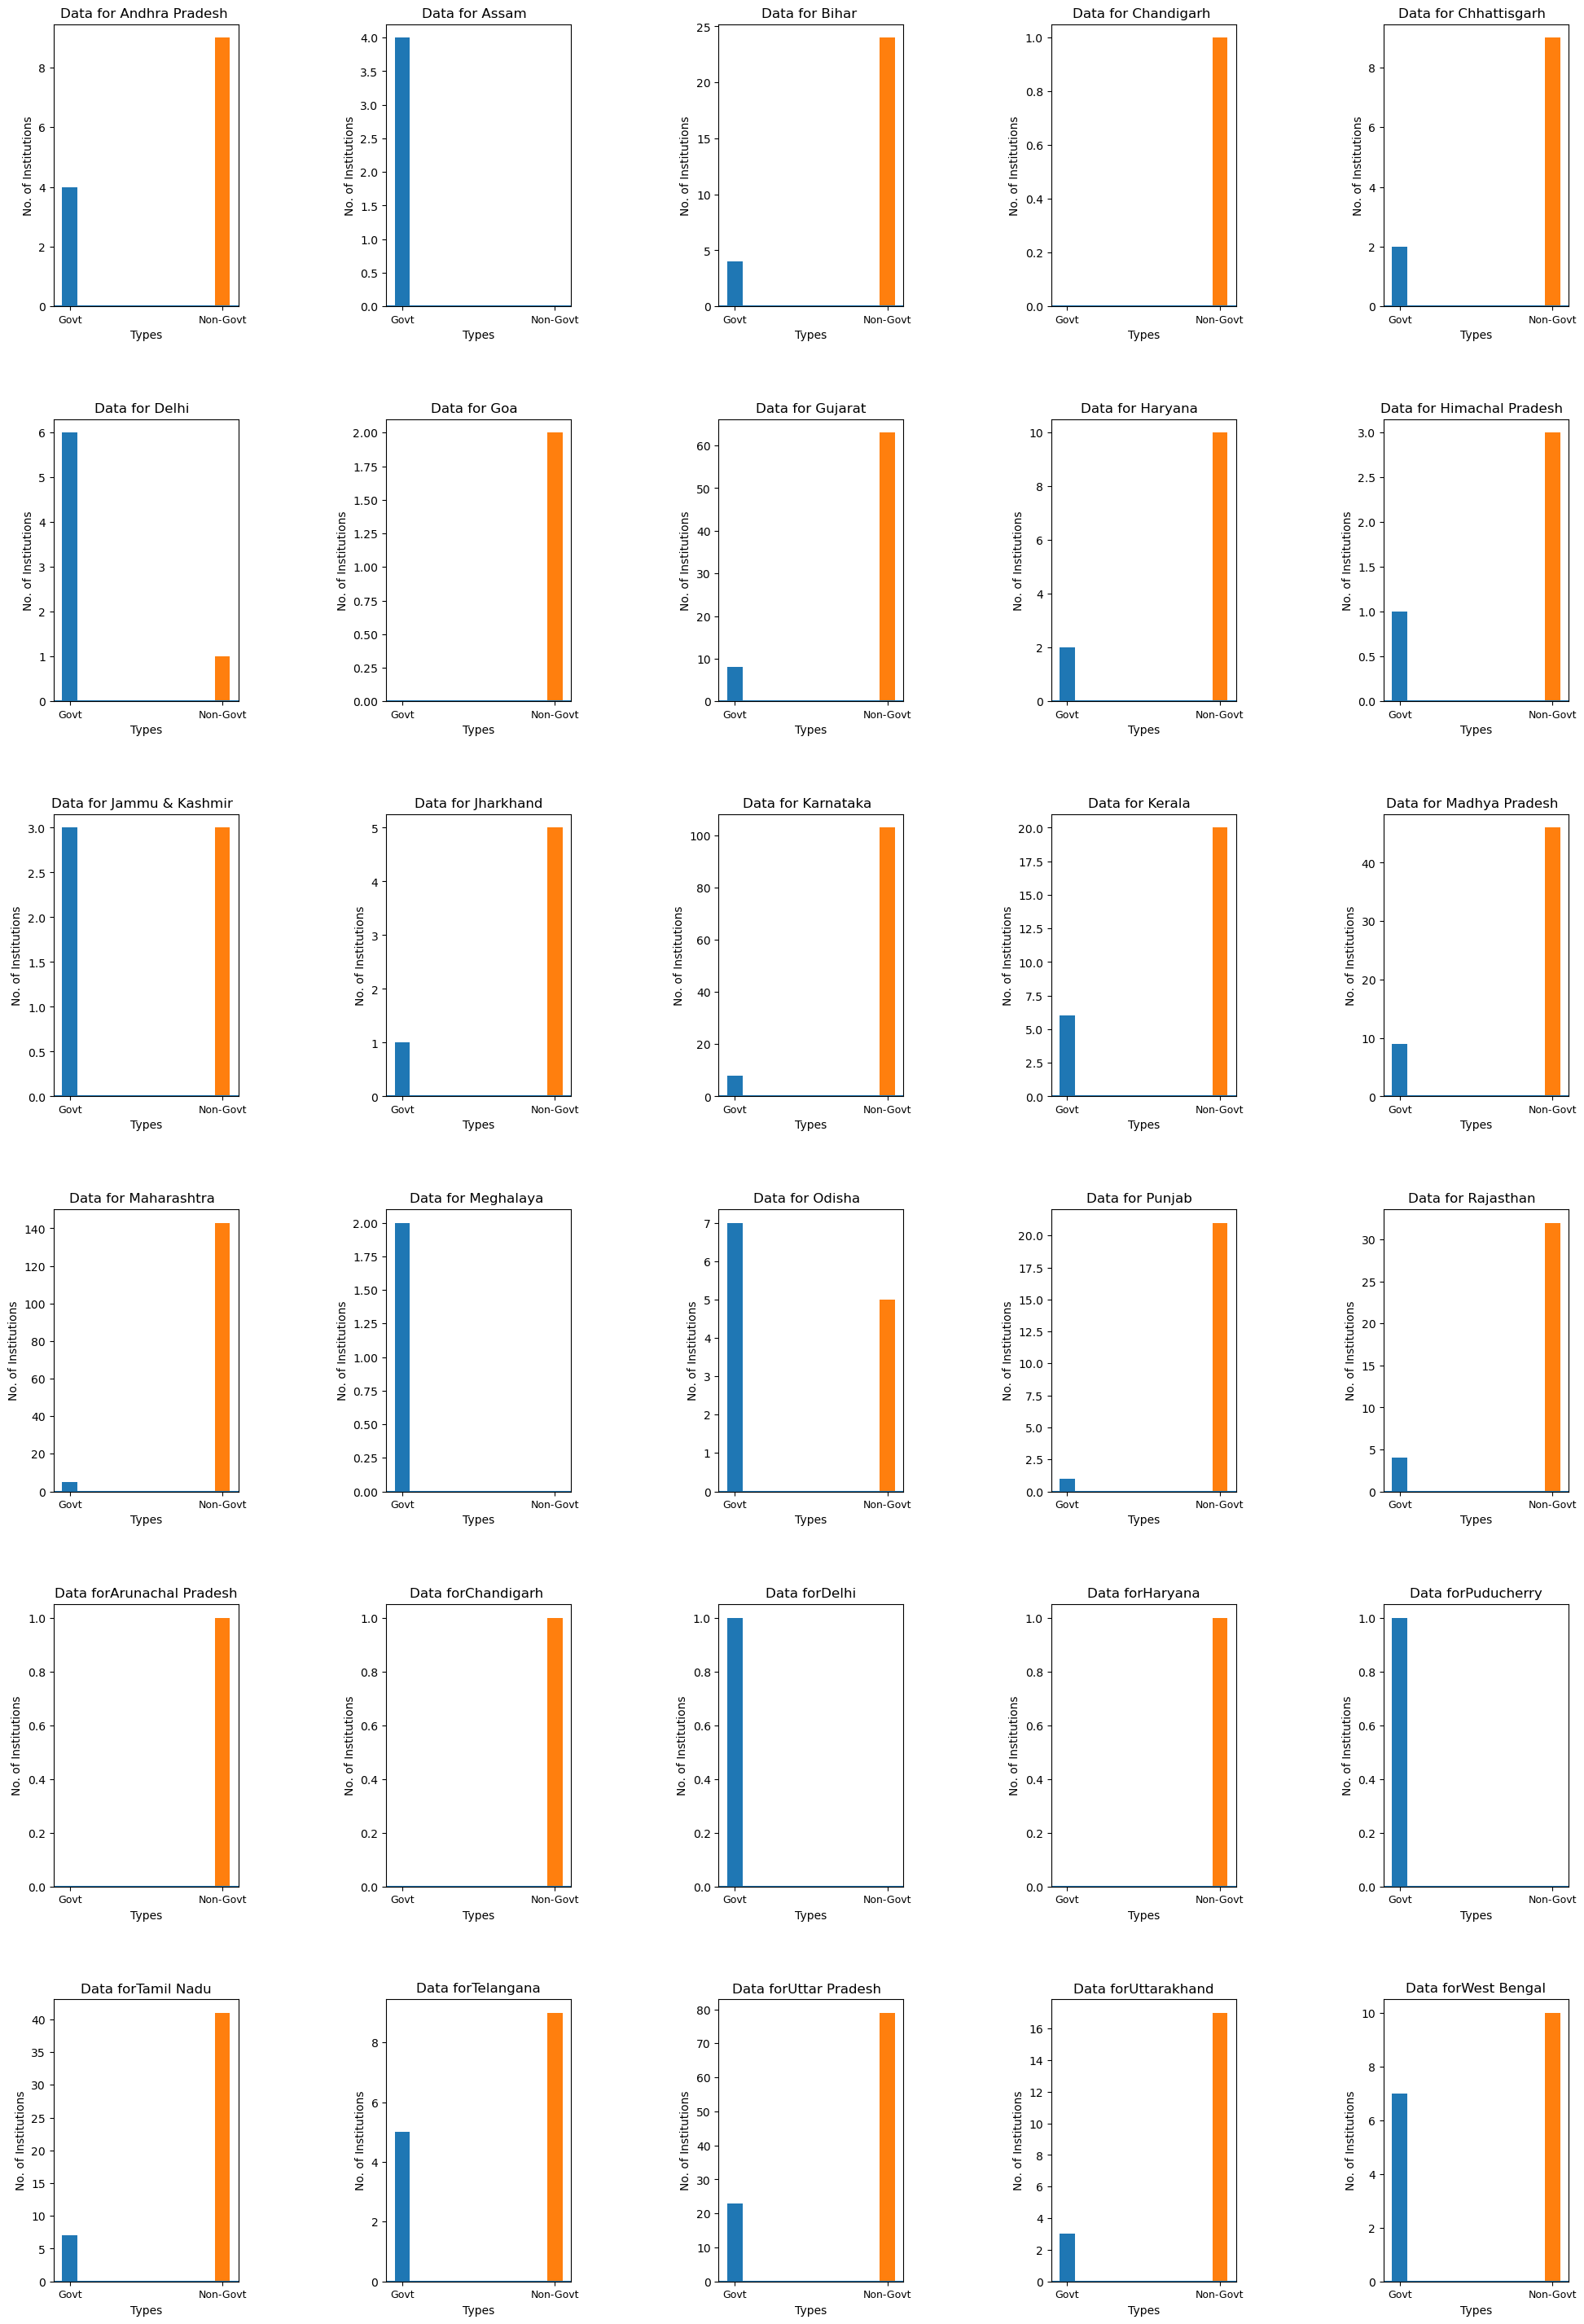

In [29]:
fig, axs = plt.subplots(nrows=6, ncols=5, figsize=(24, 36))

# Flatten the axs array so we can loop through it like a 1D array
axs = axs.flatten()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
# Loop through each row in the DataFrame
for i, (index, row) in enumerate(grouping_without_ayush.iterrows()):
    # Plot a stacked bar chart for the row's data
    axs[i].bar(row.index, row.values, color=colors, width=0.1)
    axs[i].axhline(y=0)
    axs[i].set_xticklabels(row.index, fontsize=9, wrap=True)
    # Customize the plot as desired
    axs[i].set_title(f"Data for{row.name}")
    axs[i].set_xlabel("Types")
    axs[i].set_ylabel("No. of Institutions")

# Hide any unused subplots
for j in range(i+1, len(axs)):
    axs[j].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.8)

# Show the plot
plt.show()

In [37]:
grouped2 = df_ayush.groupby(['Type of System', 'State or Union Territory'])
grouping_with_ayush = grouped2.sum()
grouping_with_ayush

No. of Colleges - Govt  \
Type of System State or Union Territory                           
Ayurveda        Andhra Pradesh                                1   
                Assam                                         1   
                Bihar                                         2   
                Chhattisgarh                                  2   
                Delhi                                         3   
...                                                         ...   
Unani          Tamil Nadu                                     1   
               Telangana                                      2   
               Uttar Pradesh                                  3   
               Uttarakhand                                    0   
               West Bengal                                    0   

                                         Admission Capacity - Govt  \
Type of System State or Union Territory                              
Ayurveda        Andhra Pradesh                                 100   
                Assam                                           93   
                Bihar                                          211   
                Chhattisgarh                                   216   
                Delhi                                          359   
...                                                            ...   
Unani          Tamil Nadu                                       75   
               Telangana                                       157   
               Uttar Pradesh                                   256   
               Uttarakhand                                       0   
               West Bengal                                       0   

                                         Permitted Seats - Govt  \
Type of System State or Union Territory                           
Ayurveda        Andhra Pradesh                              100   
                Assam                                        93   
                Bihar                                       211   
                Chhattisgarh                                216   
                Delhi                                       359   
...                                                         ...   
Unani          Tamil Nadu                                    75   
               Telangana                                    153   
               Uttar Pradesh                                256   
               Uttarakhand                                    0   
               West Bengal                                    0   

                                         No. of Colleges - Non-Govt  \
Type of System State or Union Territory                               
Ayurveda        Andhra Pradesh                                    2   
                Assam                                             0   
                Bihar                                             6   
                Chhattisgarh                                      4   
                Delhi                                             0   
...                                                             ...   
Unani          Tamil Nadu                                         0   
               Telangana                                          1   
               Uttar Pradesh                                     13   
               Uttarakhand                                        1   
               West Bengal                                        1   

                                         Admission Capacity - Non-Govt  \
Type of System State or Union Territory                                  
Ayurveda        Andhra Pradesh                                     176   
                Assam                                                0   
                Bihar                                              280   
                Chhattisgarh                                       280   
                De

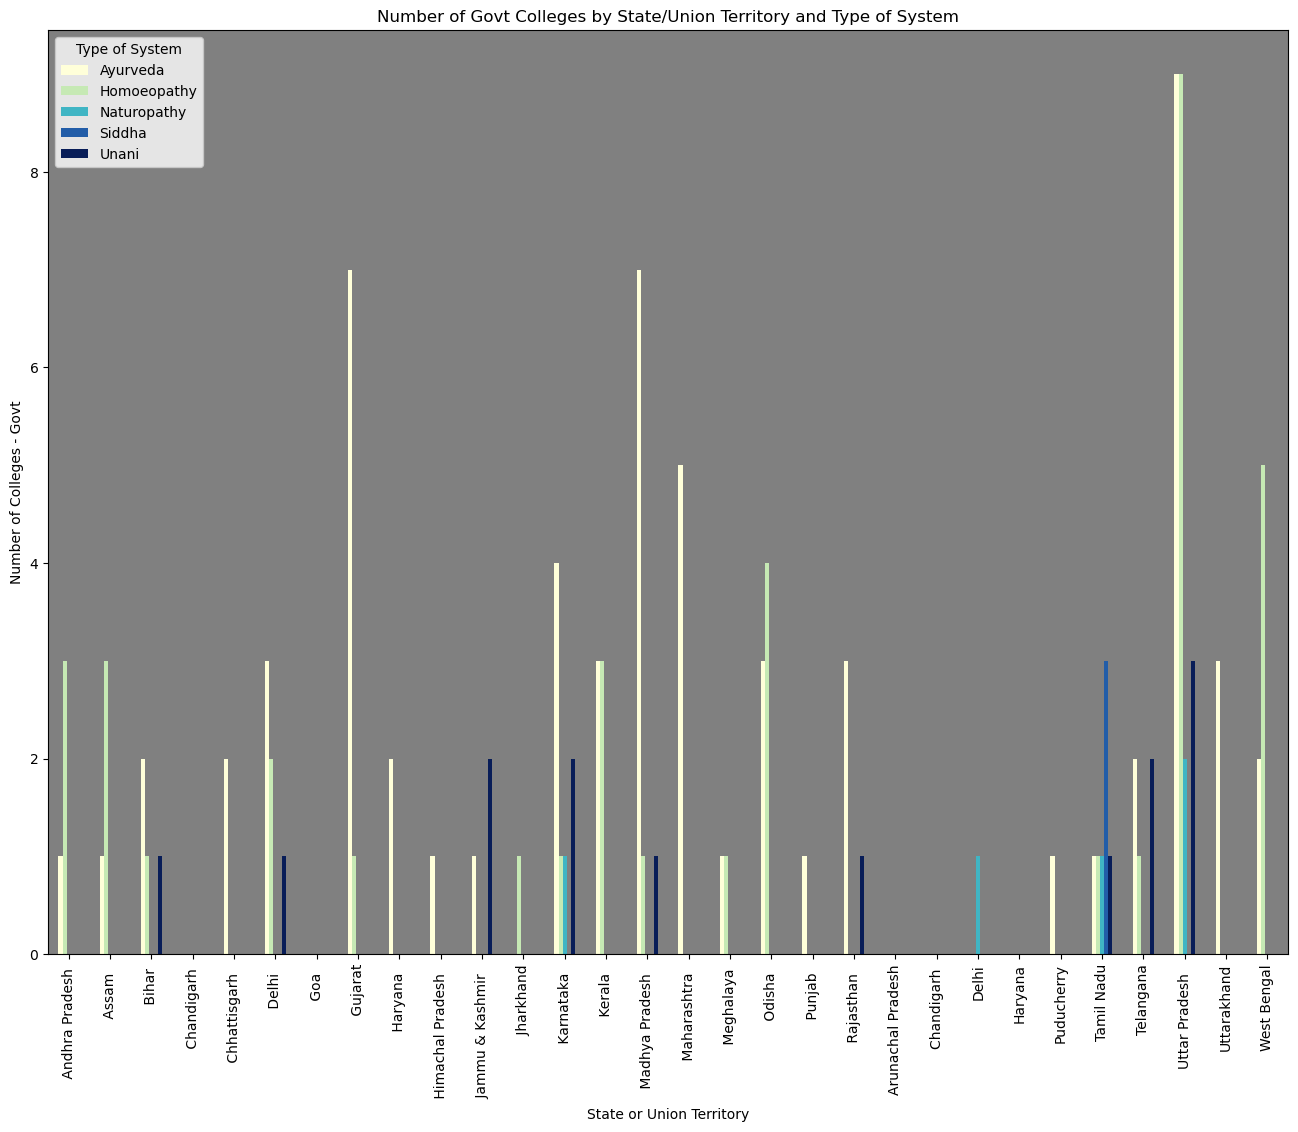

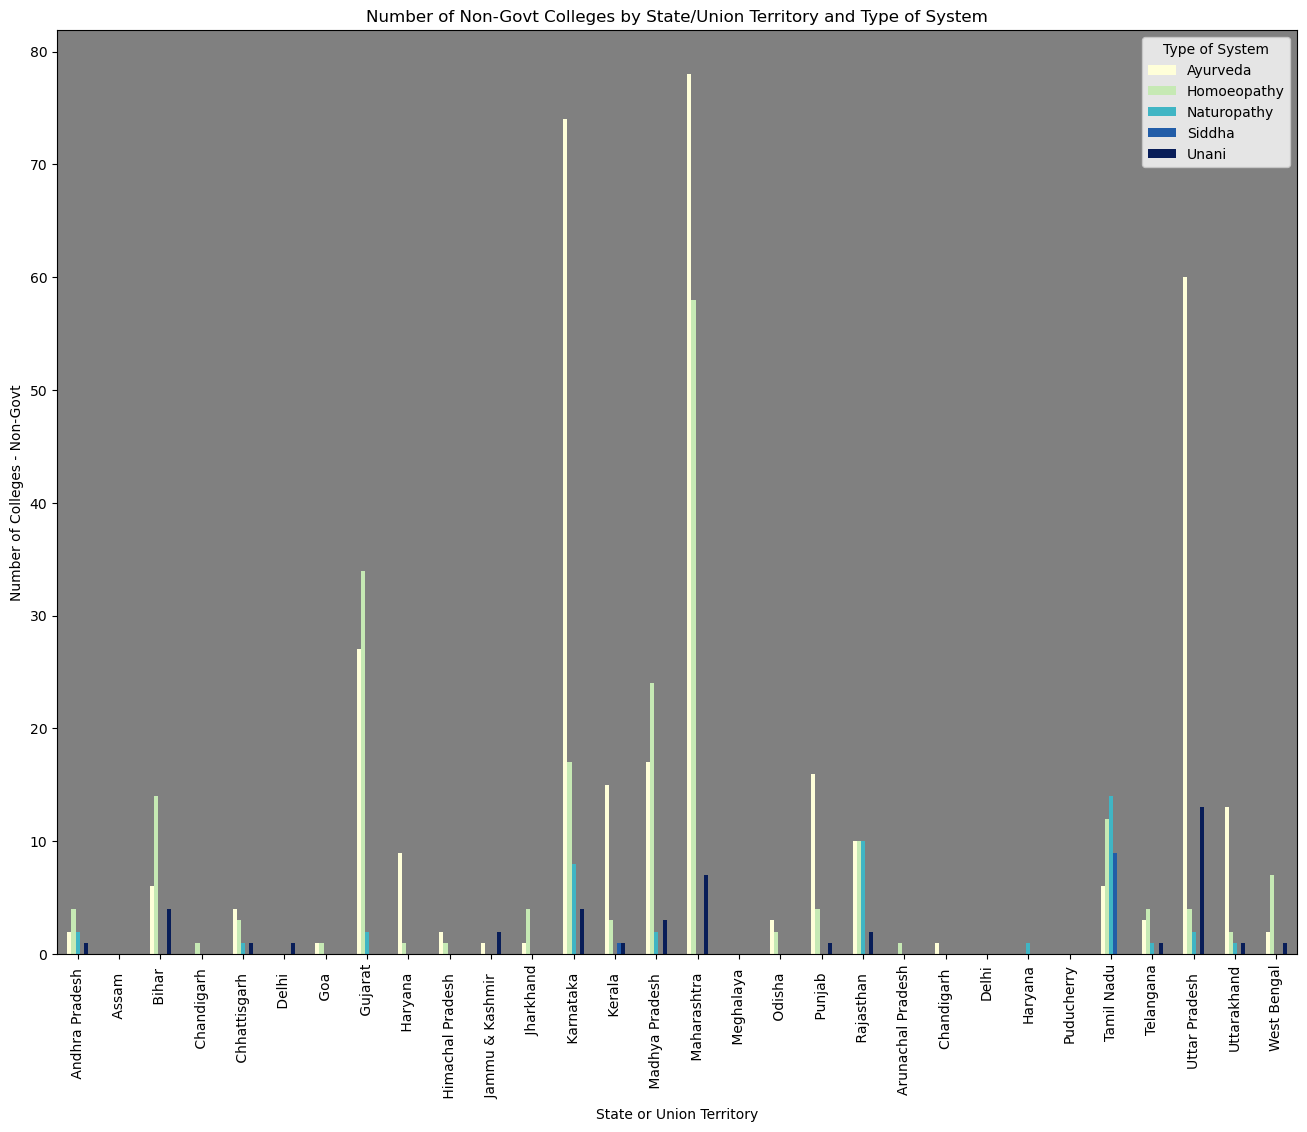

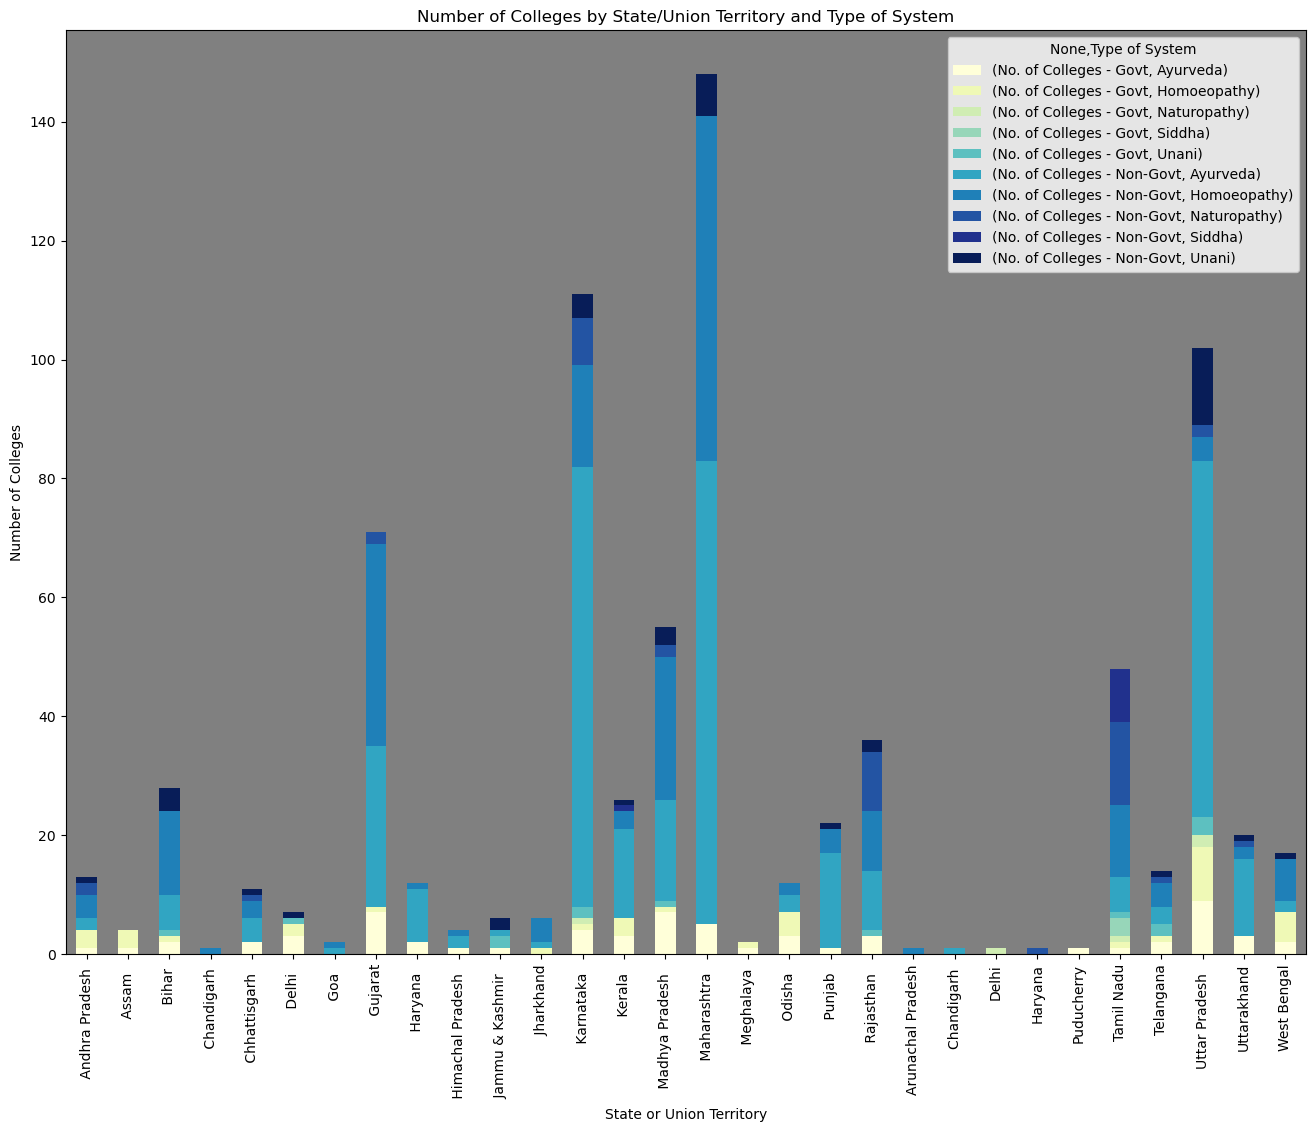

In [64]:
grouped2 = df_ayush.groupby(['State or Union Territory', 'Type of System']).sum()
cmap = plt.cm.get_cmap('YlGnBu')


# Create a bar chart for No. of Colleges - Govt
fig1, ax1 = plt.subplots(figsize=(16, 12))
ax1.set_facecolor("gray")
govt_colleges = grouped2['No. of Colleges - Govt'].unstack()
govt_colleges.plot(kind='bar',colormap=cmap, ax=ax1)
ax1.set_xlabel('State or Union Territory')
ax1.set_ylabel('Number of Colleges - Govt')
ax1.set_title('Number of Govt Colleges by State/Union Territory and Type of System')

# Create a bar chart for No. of Colleges - Non-Govt
fig2, ax2 = plt.subplots(figsize=(16, 12))
ax2.set_facecolor("gray")
non_govt_colleges = grouped2['No. of Colleges - Non-Govt'].unstack()
non_govt_colleges.plot(kind='bar', ax=ax2, colormap=cmap)
ax2.set_xlabel('State or Union Territory')
ax2.set_ylabel('Number of Colleges - Non-Govt')
ax2.set_title('Number of Non-Govt Colleges by State/Union Territory and Type of System')

# Create a stacked bar chart for No. of Colleges - Govt and No. of Colleges - Non-Govt
fig3, ax3 = plt.subplots(figsize=(16, 12))
ax3.set_facecolor("gray")
grouped2[['No. of Colleges - Govt', 'No. of Colleges - Non-Govt']].unstack().plot(kind='bar',colormap=cmap, stacked=True, ax=ax3)
ax3.set_xlabel('State or Union Territory')
ax3.set_ylabel('Number of Colleges')
ax3.set_title('Number of Colleges by State/Union Territory and Type of System')

# Show the plots
plt.show()


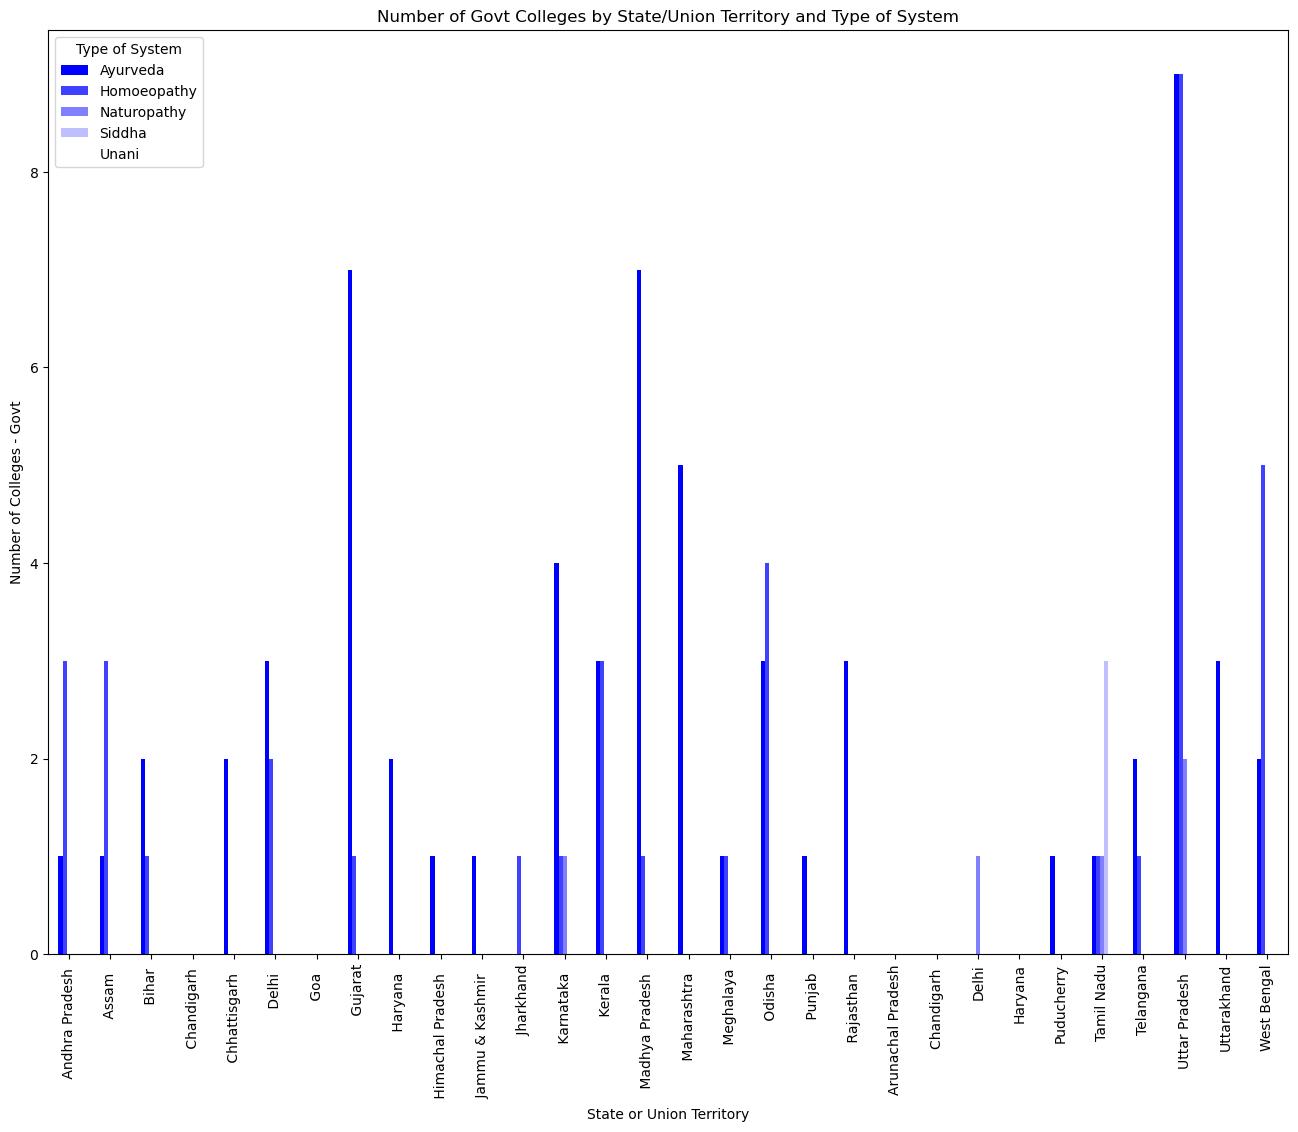

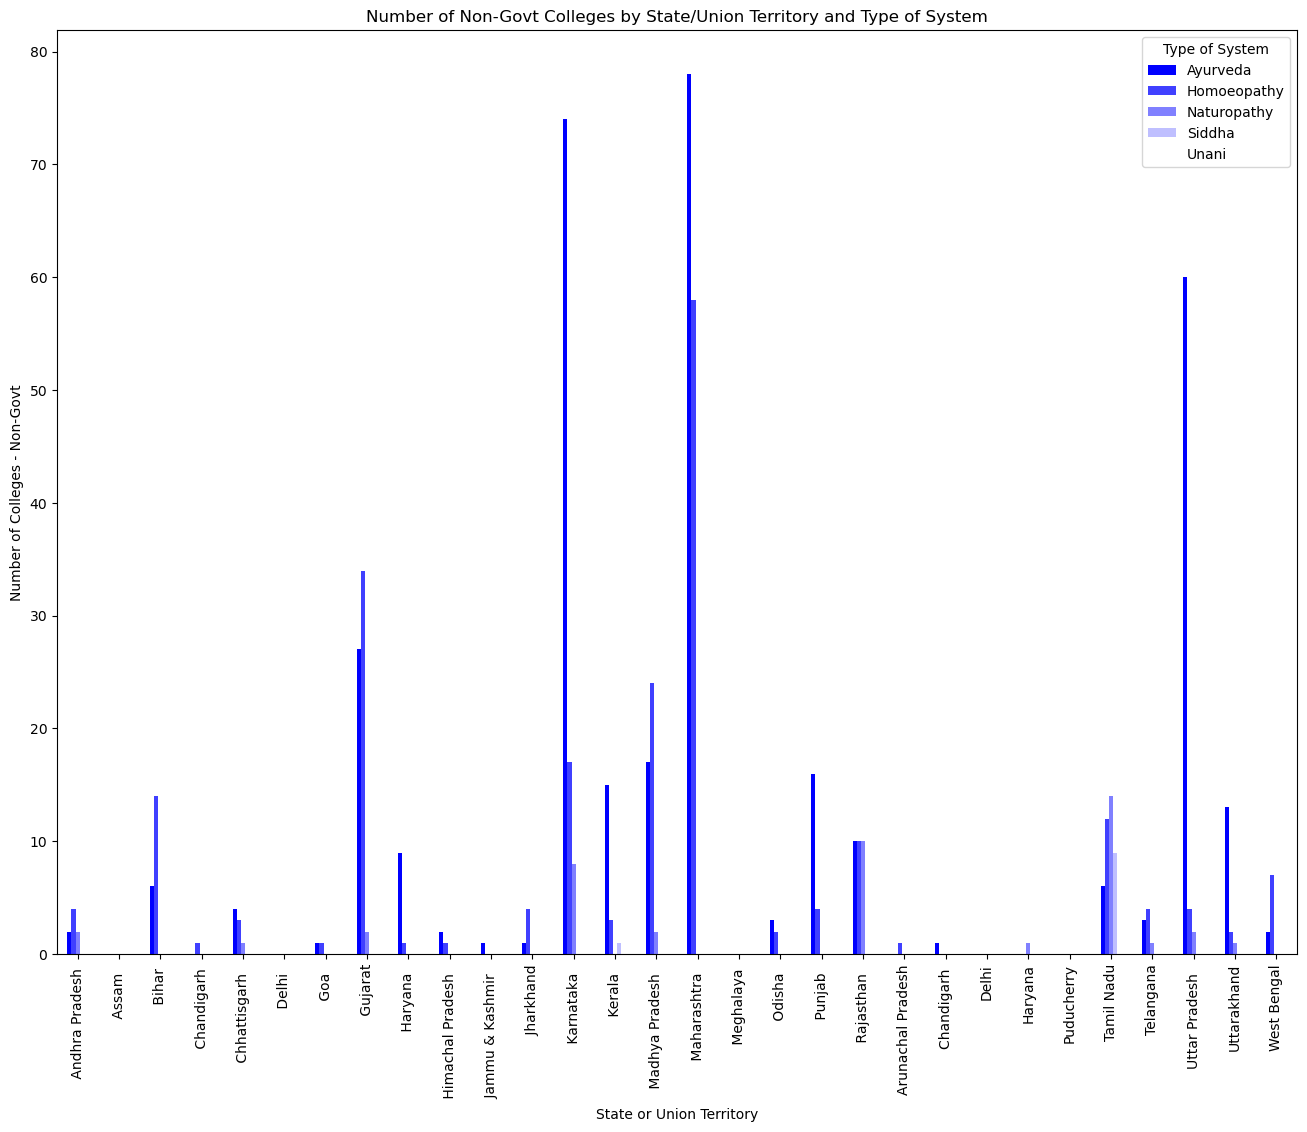

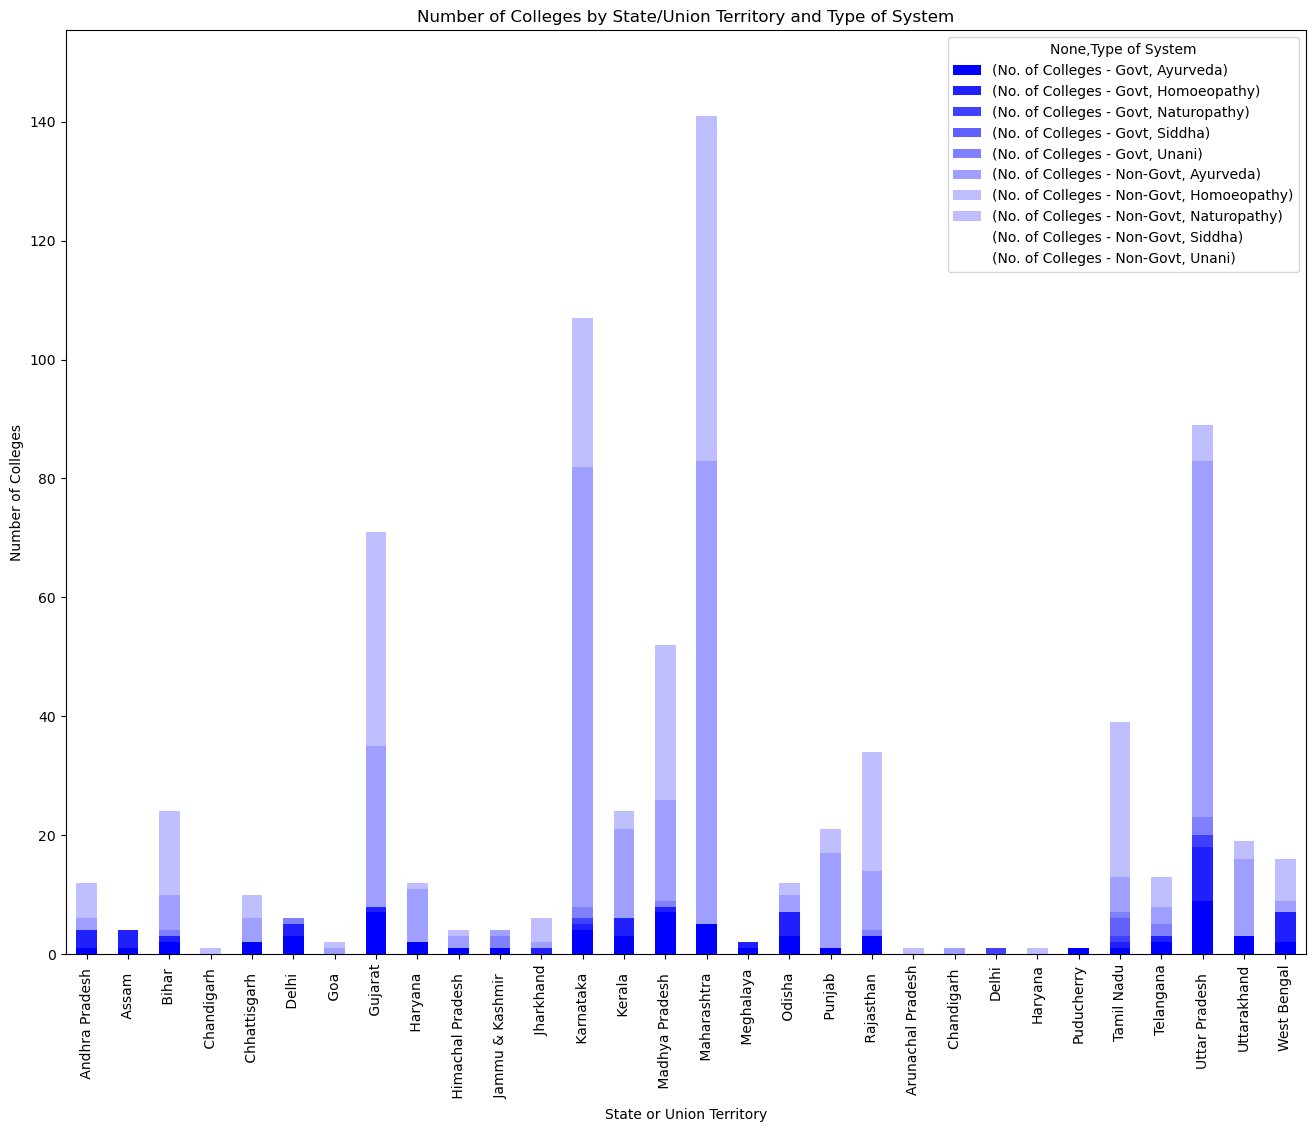

In [67]:
import matplotlib.colors as colors
import matplotlib.colors as mcolors

base_color = 'blue'
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by blending it with white
    """
    color = mcolors.to_rgb(color)
    white = (1.0, 1.0, 1.0)
    red = color[0] + (white[0] - color[0]) * amount
    green = color[1] + (white[1] - color[1]) * amount
    blue = color[2] + (white[2] - color[2]) * amount
    return (red, green, blue)

palette1 = colors.ListedColormap(
    [lighten_color(base_color, i) for i in np.linspace(0, 1, 9)]
)

grouped2 = df_ayush.groupby(['State or Union Territory', 'Type of System']).sum()


# Create a bar chart for No. of Colleges - Govt
fig1, ax1 = plt.subplots(figsize=(16, 12))
govt_colleges = grouped2['No. of Colleges - Govt'].unstack()
govt_colleges.plot(kind='bar',colormap=palette1, ax=ax1)
ax1.set_xlabel('State or Union Territory')
ax1.set_ylabel('Number of Colleges - Govt')
ax1.set_title('Number of Govt Colleges by State/Union Territory and Type of System')

# Create a bar chart for No. of Colleges - Non-Govt

fig2, ax2 = plt.subplots(figsize=(16, 12))
non_govt_colleges = grouped2['No. of Colleges - Non-Govt'].unstack()
non_govt_colleges.plot(kind='bar', ax=ax2, colormap=palette1)
ax2.set_xlabel('State or Union Territory')
ax2.set_ylabel('Number of Colleges - Non-Govt')
ax2.set_title('Number of Non-Govt Colleges by State/Union Territory and Type of System')

# Create a stacked bar chart for No. of Colleges - Govt and No. of Colleges - Non-Govt
fig3, ax3 = plt.subplots(figsize=(16, 12))
grouped2[['No. of Colleges - Govt', 'No. of Colleges - Non-Govt']].unstack().plot(kind='bar',colormap=palette1, stacked=True, ax=ax3)
ax3.set_xlabel('State or Union Territory')
ax3.set_ylabel('Number of Colleges')
ax3.set_title('Number of Colleges by State/Union Territory and Type of System')

# Show the plots
plt.show()


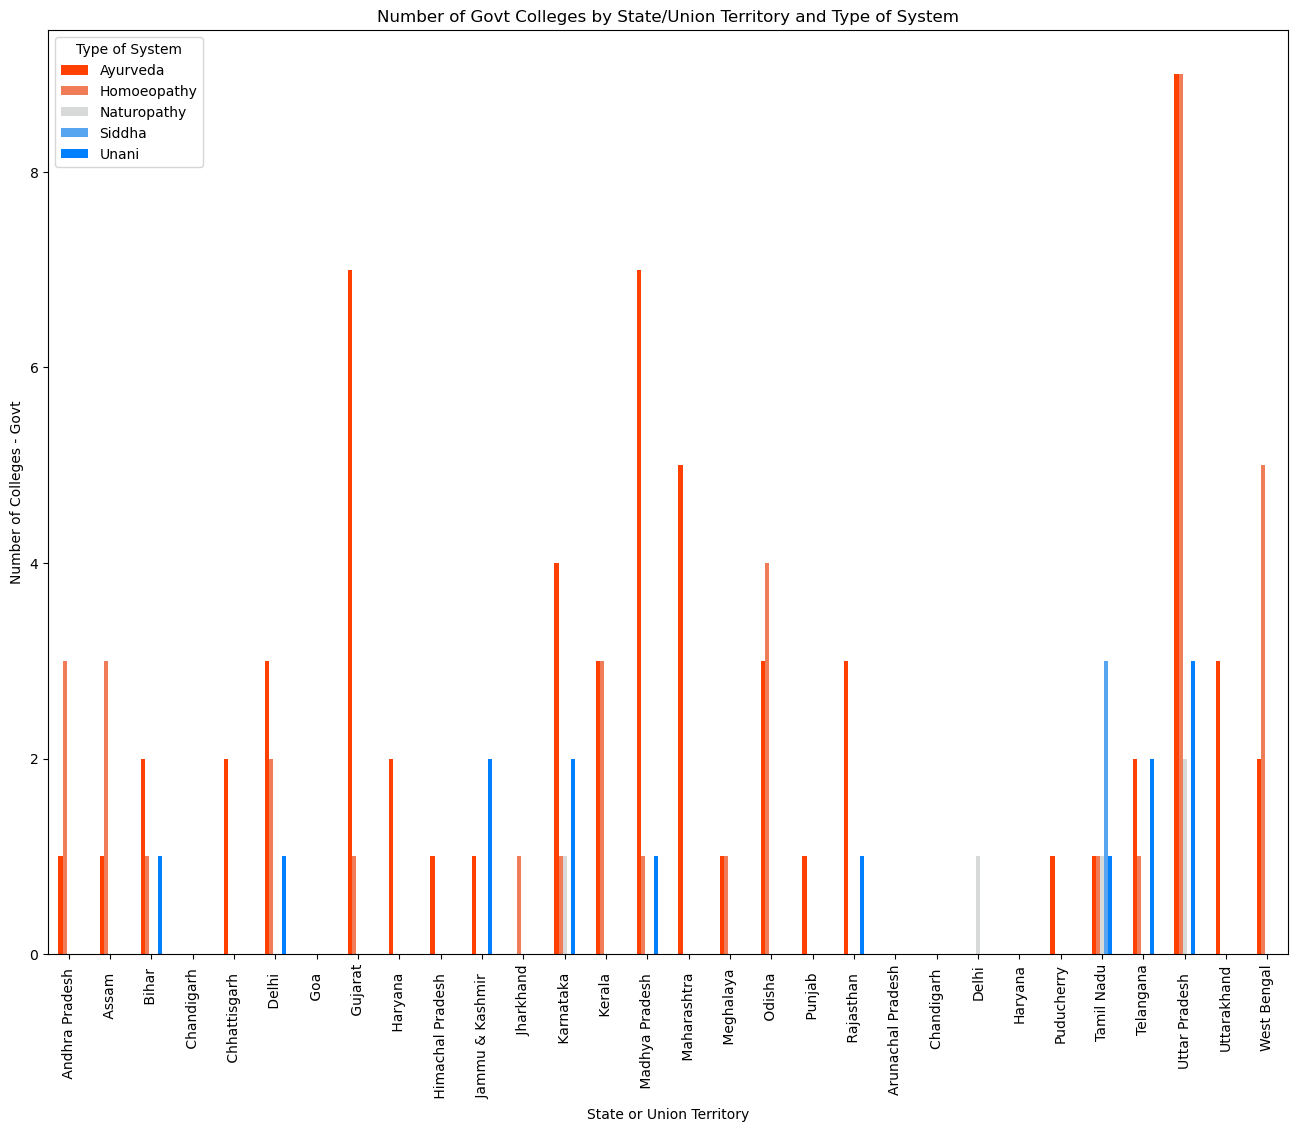

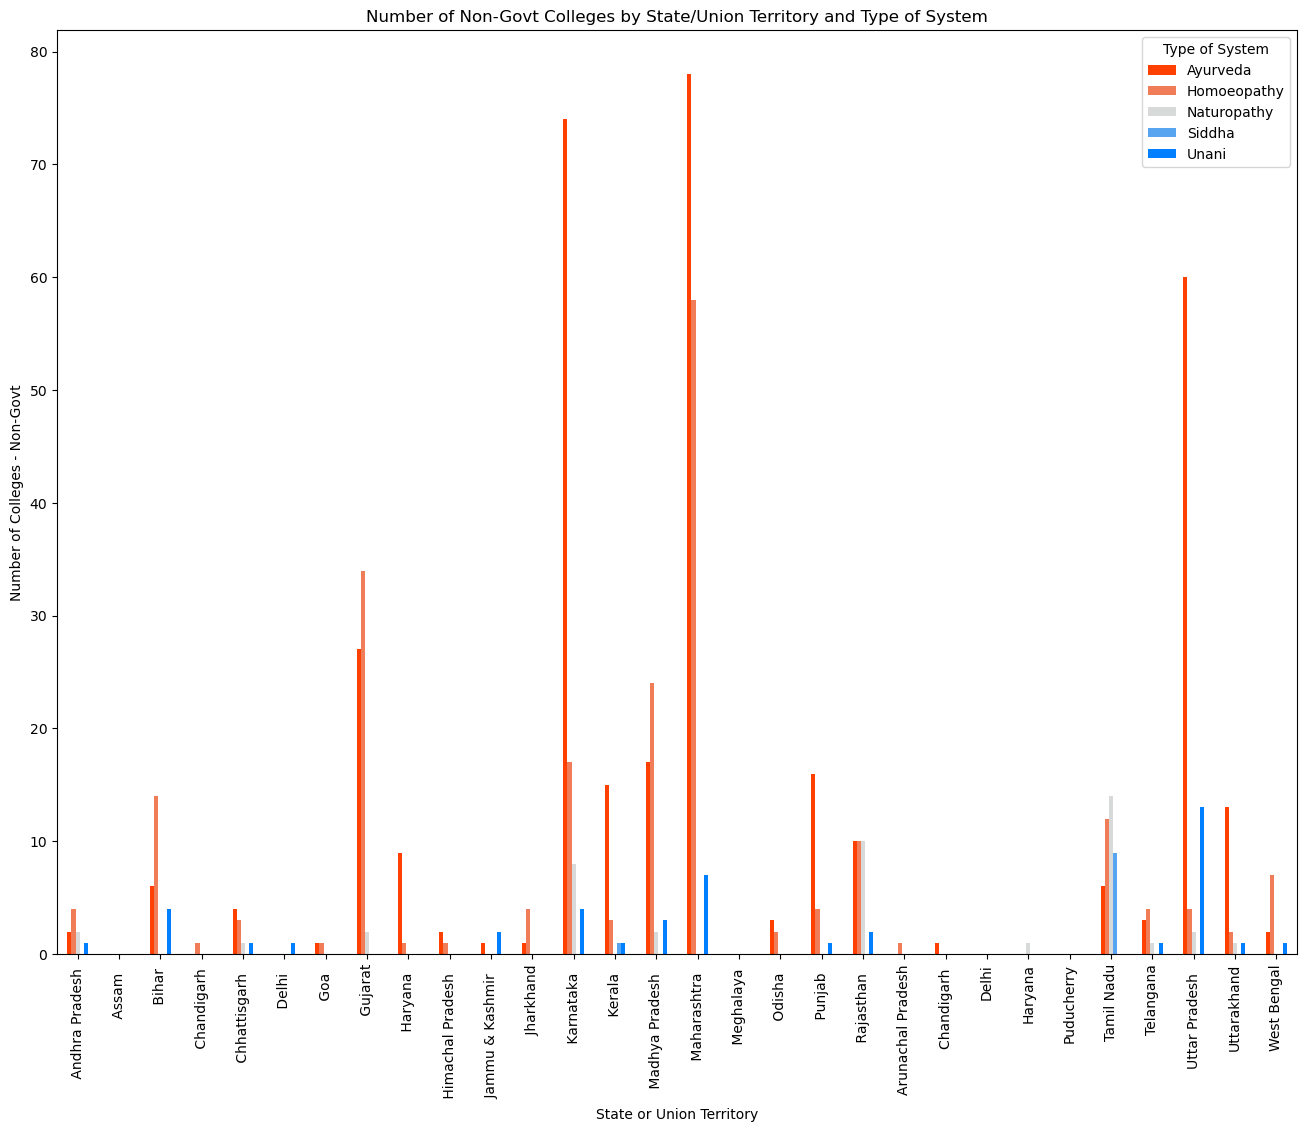

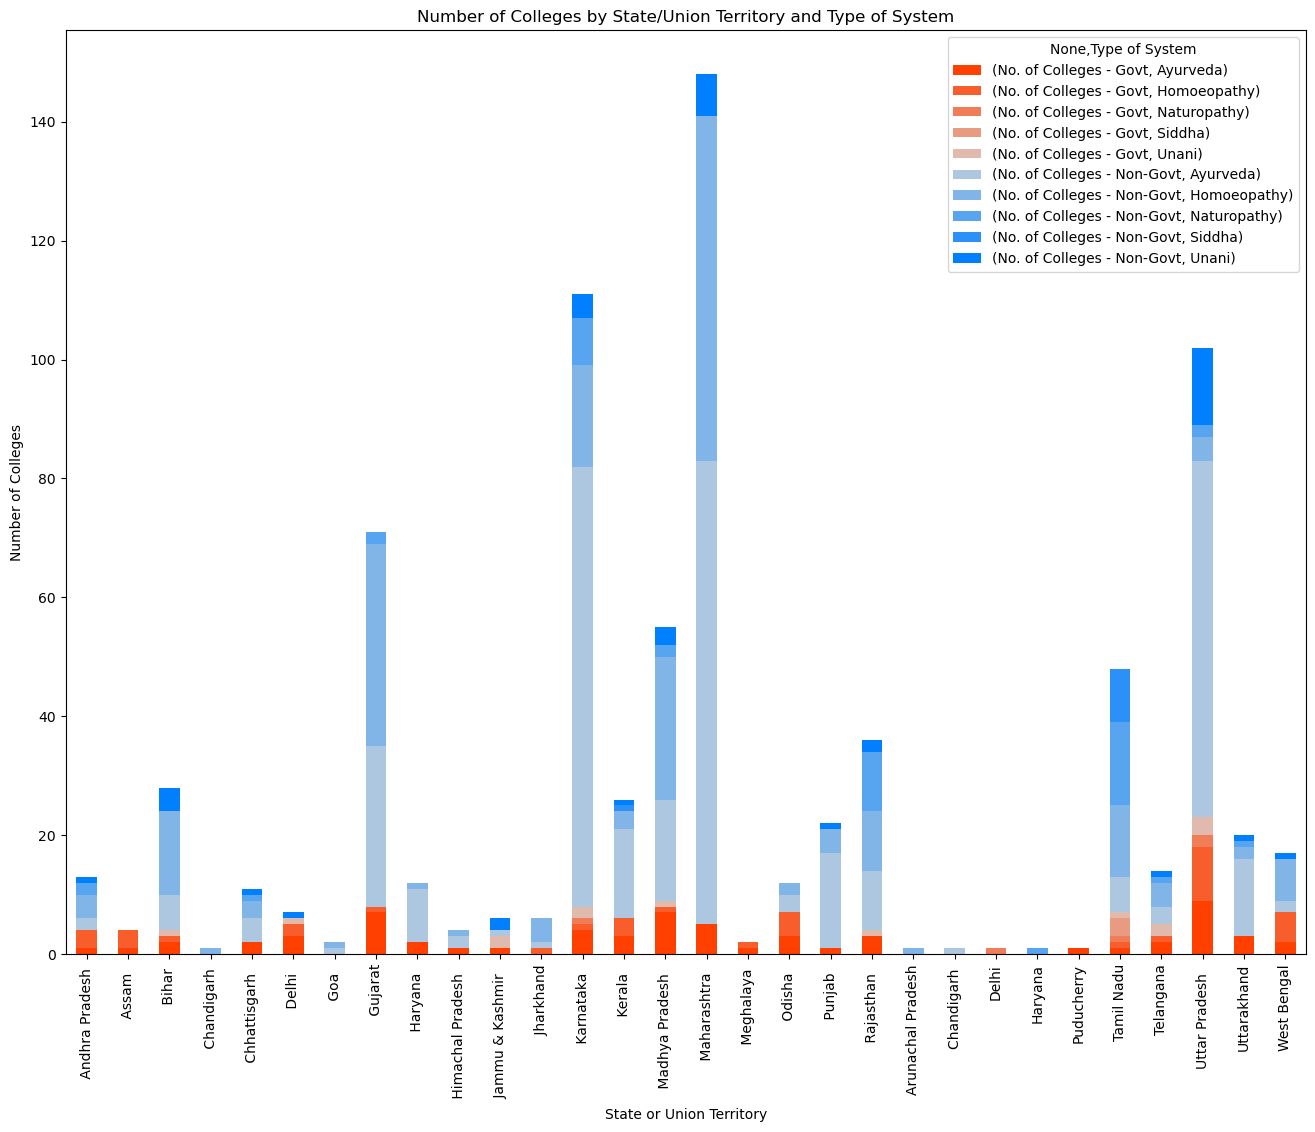

In [68]:
import matplotlib.colors as colors
import matplotlib.colors as mcolors
color_start = '#ff4000'   # blue
color_end = '#0080ff'     # red
color_neutral = '#d9d9d9' # gray

# Create a list of colors that transitions from blue to red through the neutral gray color
colors_list = [colors.LinearSegmentedColormap.from_list("", [color_start, color_neutral, color_end])(x) for x in np.linspace(0, 1, 11)]

# Use the ListedColormap function to create a bipolar sequential palette
palette2 = colors.ListedColormap(colors_list, name='bipolar')


grouped2 = df_ayush.groupby(['State or Union Territory', 'Type of System']).sum()


# Create a bar chart for No. of Colleges - Govt
fig1, ax1 = plt.subplots(figsize=(16, 12))
govt_colleges = grouped2['No. of Colleges - Govt'].unstack()
govt_colleges.plot(kind='bar',colormap=palette2, ax=ax1)
ax1.set_xlabel('State or Union Territory')
ax1.set_ylabel('Number of Colleges - Govt')
ax1.set_title('Number of Govt Colleges by State/Union Territory and Type of System')

# Create a bar chart for No. of Colleges - Non-Govt

fig2, ax2 = plt.subplots(figsize=(16, 12))
non_govt_colleges = grouped2['No. of Colleges - Non-Govt'].unstack()
non_govt_colleges.plot(kind='bar', ax=ax2, colormap=palette2)
ax2.set_xlabel('State or Union Territory')
ax2.set_ylabel('Number of Colleges - Non-Govt')
ax2.set_title('Number of Non-Govt Colleges by State/Union Territory and Type of System')

# Create a stacked bar chart for No. of Colleges - Govt and No. of Colleges - Non-Govt
fig3, ax3 = plt.subplots(figsize=(16, 12))
grouped2[['No. of Colleges - Govt', 'No. of Colleges - Non-Govt']].unstack().plot(kind='bar',colormap=palette2, stacked=True, ax=ax3)
ax3.set_xlabel('State or Union Territory')
ax3.set_ylabel('Number of Colleges')
ax3.set_title('Number of Colleges by State/Union Territory and Type of System')

# Show the plots
plt.show()
